Đã tìm thấy đường đi đến đích!
Độ dài đường đi: 87
Thời gian thực thi: 0.0286 giây


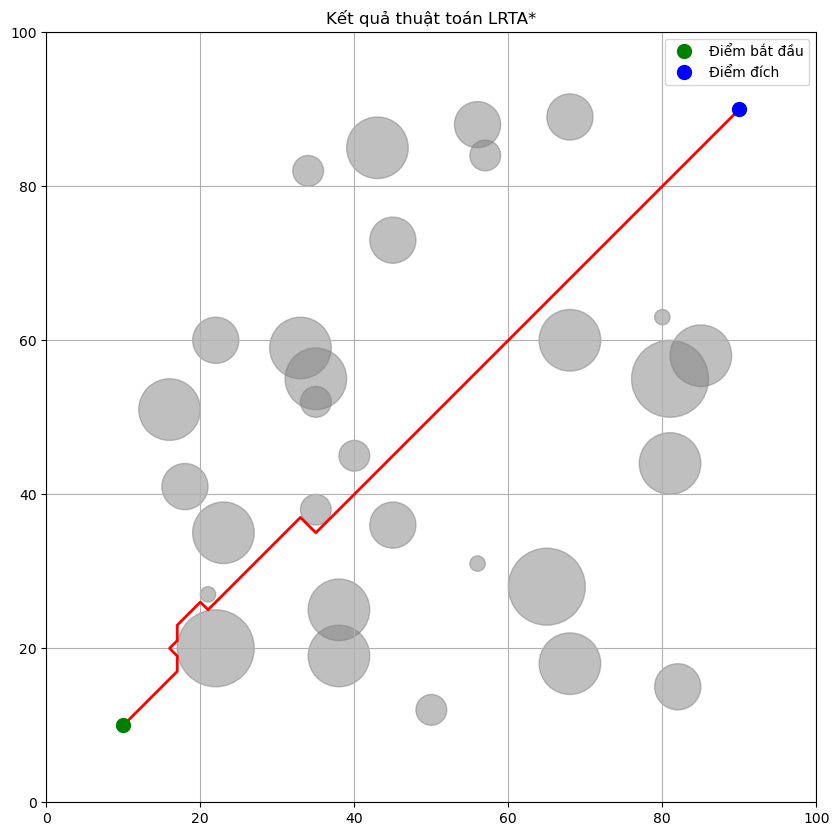

In [1]:
import random
import math
import time
import matplotlib.pyplot as plt

def create_obstacle(x, y, radius):
    return {"x": x, "y": y, "radius": radius}

def heuristic(a, goal):
    return math.sqrt((goal[0] - a[0]) ** 2 + (goal[1] - a[1]) ** 2)

def distance(a, b):
    return math.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

def is_collision(point, obstacle):
    return distance((obstacle["x"], obstacle["y"]), point) <= obstacle["radius"]

def get_neighbors(current, obstacles, max_coord=100):
    neighbors = []
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
        x, y = current[0] + dx, current[1] + dy
        if 0 <= x < max_coord and 0 <= y < max_coord:
            if not any(is_collision((x, y), obs) for obs in obstacles):
                neighbors.append((x, y))
    return neighbors

def lrta_star(start, goal, obstacles, max_steps=1000):
    h = {}  # Heuristic values
    path = [start]
    s = start

    # Initialize heuristic values if undefined
    for x in range(100):
        for y in range(100):
            h[(x, y)] = heuristic((x, y), goal)

    for _ in range(max_steps):
        if s == goal:
            return path

        # Generate depth-1 neighborhood
        neighbors = get_neighbors(s, obstacles)

        # Compute h'(s)
        h_prime = min(distance(s, s_prime) + h.get(s_prime, heuristic(s_prime, goal)) for s_prime in neighbors)

        # Update h(s) if necessary
        if h_prime > h.get(s, 0):
            h[s] = h_prime

        # Choose the best neighbor
        s_next = min(neighbors, key=lambda s_prime: distance(s, s_prime) + h.get(s_prime, heuristic(s_prime, goal)))

        # Move to the best neighbor
        s = s_next
        path.append(s)

    return path  # Return path even if goal not reached

def plot_result(obstacles, path, start, goal):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_aspect('equal')

    # Vẽ các chướng ngại vật
    for obstacle in obstacles:
        circle = plt.Circle((obstacle["x"], obstacle["y"]), obstacle["radius"],
                            fill=True, color='gray', alpha=0.5)
        ax.add_artist(circle)

    # Vẽ đường đi
    if path:
        path_x, path_y = zip(*path)
        ax.plot(path_x, path_y, 'r-', linewidth=2)

    # Vẽ điểm bắt đầu và điểm đích
    ax.plot(start[0], start[1], 'go', markersize=10, label='Điểm bắt đầu')
    ax.plot(goal[0], goal[1], 'bo', markersize=10, label='Điểm đích')

    ax.legend()
    ax.set_title('Kết quả thuật toán LRTA*')
    plt.grid(True)

    # Lưu ảnh
    plt.savefig('pic2.png', dpi=300, bbox_inches='tight')
    
    plt.show()

def main():
    # Thiết lập môi trường và các tham số
    obstacles = [create_obstacle(random.randint(11, 89), random.randint(11, 89), random.choice([1, 2, 3, 4, 5])) for _ in range(30)]
    start = (10, 10)
    goal = (90, 90)

    # Bắt đầu đo thời gian
    start_time = time.time()

    # Chạy thuật toán LRTA*
    path = lrta_star(start, goal, obstacles)

    # Kết thúc đo thời gian
    end_time = time.time()
    execution_time = end_time - start_time

    # In kết quả
    if path[-1] == goal:
        print("Đã tìm thấy đường đi đến đích!")
    else:
        print("Không tìm thấy đường đi đến đích trong số bước giới hạn.")
    print(f"Độ dài đường đi: {len(path)}")
    print(f"Thời gian thực thi: {execution_time:.4f} giây")

    # Vẽ kết quả
    plot_result(obstacles, path, start, goal)

if __name__ == "__main__":
    main()

Số lần chạy: 1000
Tổng thời gian chạy: 4.507736444473267 giây
Thời gian trung bình: 0.004507 giây
Độ lệch chuẩn thời gian: 0.002062 giây
Thời gian ngắn nhất: 0.000000 giây
Thời gian dài nhất: 0.011385 giây
Độ dài đường đi trung bình: 51.00


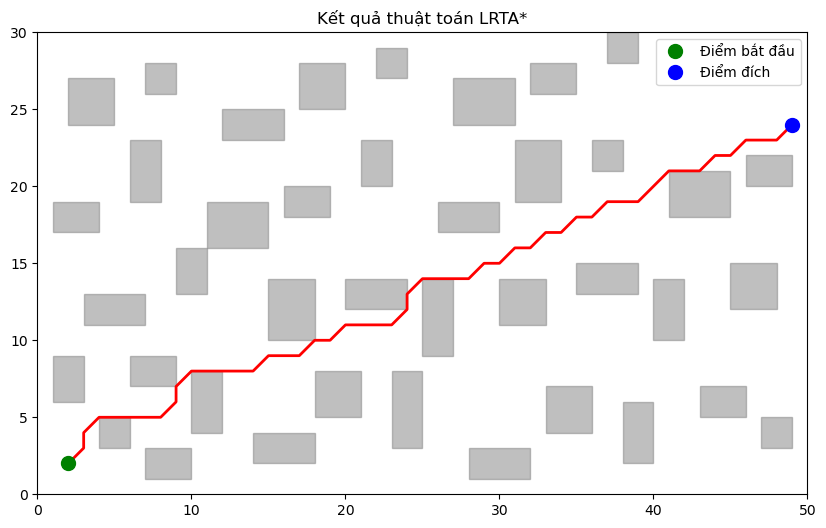

In [5]:
import random
import math
import time
import matplotlib.pyplot as plt
import statistics

# Thiết lập các thông số môi trường
WIDTH = 50
HEIGHT = 30
START = (2, 2)
GOAL = (49, 24)

def create_obstacles():
    return [
        ((4, 3), 2, 2), ((7, 1), 3, 2), ((1, 6), 2, 3), ((6, 7), 3, 2),
        ((10, 4), 2, 4), ((14, 2), 4, 2), ((18, 5), 3, 3), ((23, 3), 2, 5),
        ((28, 1), 4, 2), ((33, 4), 3, 3), ((38, 2), 2, 4), ((43, 5), 3, 2),
        ((47, 3), 2, 2), ((3, 11), 4, 2), ((9, 13), 2, 3), ((15, 10), 3, 4),
        ((20, 12), 4, 2), ((25, 9), 2, 5), ((30, 11), 3, 3), ((35, 13), 4, 2),
        ((40, 10), 2, 4), ((45, 12), 3, 3), ((1, 17), 3, 2), ((6, 19), 2, 4),
        ((11, 16), 4, 3), ((16, 18), 3, 2), ((21, 20), 2, 3), ((26, 17), 4, 2),
        ((31, 19), 3, 4), ((36, 21), 2, 2), ((41, 18), 4, 3), ((46, 20), 3, 2),
        ((2, 24), 3, 3), ((7, 26), 2, 2), ((12, 23), 4, 2), ((17, 25), 3, 3),
        ((22, 27), 2, 2), ((27, 24), 4, 3), ((32, 26), 3, 2), ((37, 28), 2, 2)
    ]

def heuristic(a, goal):
    return math.sqrt((goal[0] - a[0]) ** 2 + (goal[1] - a[1]) ** 2)

def distance(a, b):
    return math.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

def is_collision(point, obstacle):
    x, y = point
    ox, oy = obstacle[0]
    ow, oh = obstacle[1], obstacle[2]
    return ox <= x < ox + ow and oy <= y < oy + oh

def get_neighbors(current, obstacles):
    neighbors = []
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
        x, y = current[0] + dx, current[1] + dy
        if 0 <= x < WIDTH and 0 <= y < HEIGHT:
            if not any(is_collision((x, y), obs) for obs in obstacles):
                neighbors.append((x, y))
    return neighbors

def lrta_star(start, goal, obstacles, max_steps=1000):
    h = {}  # Heuristic values
    path = [start]
    s = start

    # Initialize heuristic values if undefined
    for x in range(WIDTH):
        for y in range(HEIGHT):
            h[(x, y)] = heuristic((x, y), goal)

    for _ in range(max_steps):
        if s == goal:
            return path

        # Generate depth-1 neighborhood
        neighbors = get_neighbors(s, obstacles)

        # Compute h'(s)
        h_prime = min(distance(s, s_prime) + h.get(s_prime, heuristic(s_prime, goal)) for s_prime in neighbors)

        # Update h(s) if necessary
        if h_prime > h.get(s, 0):
            h[s] = h_prime

        # Choose the best neighbor
        s_next = min(neighbors, key=lambda s_prime: distance(s, s_prime) + h.get(s_prime, heuristic(s_prime, goal)))

        # Move to the best neighbor
        s = s_next
        path.append(s)

    return path  # Return path even if goal not reached

def plot_result(obstacles, path, start, goal):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(0, WIDTH)
    ax.set_ylim(0, HEIGHT)
    ax.set_aspect('equal')

    # Vẽ các chướng ngại vật
    for obstacle in obstacles:
        rect = plt.Rectangle(obstacle[0], obstacle[1], obstacle[2], fill=True, color='gray', alpha=0.5)
        ax.add_patch(rect)

    # Vẽ đường đi
    if path:
        path_x, path_y = zip(*path)
        ax.plot(path_x, path_y, 'r-', linewidth=2)

    # Vẽ điểm bắt đầu và điểm đích
    ax.plot(start[0], start[1], 'go', markersize=10, label='Điểm bắt đầu')
    ax.plot(goal[0], goal[1], 'bo', markersize=10, label='Điểm đích')

    ax.legend()
    ax.set_title('Kết quả thuật toán LRTA*')
    
    plt.savefig('pic4-2', dpi=300, bbox_inches='tight')
    plt.show()

def run_single_iteration(start, goal, obstacles):
    start_time = time.time()
    path = lrta_star(start, goal, obstacles)
    end_time = time.time()
    execution_time = end_time - start_time
    return path, execution_time

def main():
    obstacles = create_obstacles()
    start = START
    goal = GOAL
    total_start = time.time()
    iterations = 1000
    execution_times = []
    path_lengths = []

    for _ in range(iterations):
        path, execution_time = run_single_iteration(start, goal, obstacles)
        execution_times.append(execution_time)
        path_lengths.append(len(path))
    total_end = time.time()
    # Tính toán và in kết quả
    avg_time = statistics.mean(execution_times)
    std_dev_time = statistics.stdev(execution_times)
    min_time = min(execution_times)
    max_time = max(execution_times)
    avg_path_length = statistics.mean(path_lengths)
    total_time = total_end - total_start

    print(f"Số lần chạy: {iterations}")
    print(f"Tổng thời gian chạy: {total_time} giây")
    print(f"Thời gian trung bình: {avg_time:.6f} giây")
    print(f"Độ lệch chuẩn thời gian: {std_dev_time:.6f} giây")
    print(f"Thời gian ngắn nhất: {min_time:.6f} giây")
    print(f"Thời gian dài nhất: {max_time:.6f} giây")
    print(f"Độ dài đường đi trung bình: {avg_path_length:.2f}")

    # Vẽ kết quả cho lần chạy cuối cùng
    plot_result(obstacles, path, start, goal)

if __name__ == "__main__":
    main()